# 5. SciPy

SciPy — это библиотека Python для научных вычислений, которая предоставляет инструменты для статистического анализа, включая проверку гипотез. Рассмотрим два примера: t-критерий Стьюдента для зависимых выборок и критерий хи-квадрат Пирсона для таблиц сопряженности.

## 1. t-критерий Стьюдента для зависимых выборок

Пример: Эффективность препарата

Задача:  
Проверить, снижает ли новый препарат уровень глюкозы в крови у пациентов с диабетом. Измерения проведены до и после приема препарата (зависимые выборки).

Шаги:  
1. Формулируем гипотезы:
- H0: Средний уровень глюкозы до и после приема препарата не отличается.
- H1: Средний уровень глюкозы различается.
2. Проверяем нормальность данных: Используем `skew()` (скошенность) и `kurtosis()` (эксцесс). Значения близкие к 0 указывают на нормальность.
```python
print('Скос до:', data['before'].skew())  # 0.91 (допустимо)
print('Эксцесс до:', data['before'].kurtosis())  # -0.45 (допустимо)
```
3. Вычисляем t-критерий вручную:
- Разности значений: `diff = data['before'] - data['after']`
- Среднее разностей: `mean_diff = diff.mean()` → 3.12
- Стандартное отклонение: `std_diff = diff.std()` → 1.18
- Формула: t = mean_diff/(std_diff/√n) = 3.12/(1.18/√10) = 8.38
4. Сравниваем с критическим значением:
- Степени свободы: df = n − 1 = 9
- По таблице (Таблица 4) для α = 0.05 и df = 9: **Критическое значение = 2.26.**  
  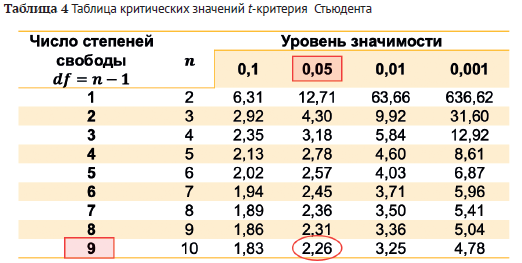
- Так как 8.38 > 2.26, отвергаем H0
5. Автоматический расчет через SciPy:
```python
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(data['before'], data['after'])
print(f"t = {t_stat:.2f}, p-value = {p_value:.5f}")  # t = 8.38, p-value = 0.000015
```
Вывод: p-value < 0.05 → различия статистически значимы.

## 2. Критерий хи-квадрат Пирсона